In [40]:
import pandas as pd
import re
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
import matplotlib.pyplot as plt
import string

In [41]:
df = pd.read_csv('data.csv')

In [42]:
df.head(50)

,content,score,thumbsUpCount,at,userName
0,masih ttp bintang satu klaim voucher khusus go...,1,39,17/11/2024,Ariefyana Fuji Lestari
1,driver tidak kompeten tolong ditegur dan diedu...,1,1,23/11/2024,denia ratna
2,tolong agar driver lebih serius dalam menerima...,2,12,17/11/2024,Sukma
3,mau login ke akun yang sudah terdaftar ketika ...,1,8,17/11/2024,Donny Setiadi
4,katanya kalau sudah berlangganan akan lebih mu...,1,2,18/11/2024,Echa 13
5,tolong ya jika memang sulit mencari driver ata...,4,5,17/11/2024,cholis viki
6,aplikasi sangat buruk di peta banyak tanda dri...,1,123,01/11/2024,yunus rio Pranatan
7,semakin lama aplikasi ini semakin tidak bergun...,1,2,18/11/2024,Ahmad Wadud
8,mulai dari proses pemesanan sampai pengantaran...,5,77,20/11/2024,Lukas Kerong N. (Luke)
9,dapat driver selalu jauh padahal ada yang deka...,1,15,15/11/2024,Syizuril


In [43]:
#Variabel baru
df_copy = df.copy()

In [44]:
# Labelling 1-2 =0 dan 3-5=1
label = []
for index, row in df_copy.iterrows():
    if row['score'] == 1 or row['score'] == 2 :
        label.append('Negatif')
    else :
        label.append('Positif')
df_copy['label'] = label  
df_copy.to_csv('Data_labeled.csv', index=False)
df_copy.head(50)

,content,score,thumbsUpCount,at,userName,label
0,masih ttp bintang satu klaim voucher khusus go...,1,39,17/11/2024,Ariefyana Fuji Lestari,Negatif
1,driver tidak kompeten tolong ditegur dan diedu...,1,1,23/11/2024,denia ratna,Negatif
2,tolong agar driver lebih serius dalam menerima...,2,12,17/11/2024,Sukma,Negatif
3,mau login ke akun yang sudah terdaftar ketika ...,1,8,17/11/2024,Donny Setiadi,Negatif
4,katanya kalau sudah berlangganan akan lebih mu...,1,2,18/11/2024,Echa 13,Negatif
5,tolong ya jika memang sulit mencari driver ata...,4,5,17/11/2024,cholis viki,Positif
6,aplikasi sangat buruk di peta banyak tanda dri...,1,123,01/11/2024,yunus rio Pranatan,Negatif
7,semakin lama aplikasi ini semakin tidak bergun...,1,2,18/11/2024,Ahmad Wadud,Negatif
8,mulai dari proses pemesanan sampai pengantaran...,5,77,20/11/2024,Lukas Kerong N. (Luke),Positif
9,dapat driver selalu jauh padahal ada yang deka...,1,15,15/11/2024,Syizuril,Negatif


PREROCESSING

In [45]:
#ubah data content menjadi huruf kecil
def casefolding(Review):
    Review = Review.lower()
    return Review
df_copy['content'] = df_copy['content'].apply(casefolding)
df_copy.head(50)

,content,score,thumbsUpCount,at,userName,label
0,masih ttp bintang satu klaim voucher khusus go...,1,39,17/11/2024,Ariefyana Fuji Lestari,Negatif
1,driver tidak kompeten tolong ditegur dan diedu...,1,1,23/11/2024,denia ratna,Negatif
2,tolong agar driver lebih serius dalam menerima...,2,12,17/11/2024,Sukma,Negatif
3,mau login ke akun yang sudah terdaftar ketika ...,1,8,17/11/2024,Donny Setiadi,Negatif
4,katanya kalau sudah berlangganan akan lebih mu...,1,2,18/11/2024,Echa 13,Negatif
5,tolong ya jika memang sulit mencari driver ata...,4,5,17/11/2024,cholis viki,Positif
6,aplikasi sangat buruk di peta banyak tanda dri...,1,123,01/11/2024,yunus rio Pranatan,Negatif
7,semakin lama aplikasi ini semakin tidak bergun...,1,2,18/11/2024,Ahmad Wadud,Negatif
8,mulai dari proses pemesanan sampai pengantaran...,5,77,20/11/2024,Lukas Kerong N. (Luke),Positif
9,dapat driver selalu jauh padahal ada yang deka...,1,15,15/11/2024,Syizuril,Negatif


In [46]:
#normalisasi kata ex:ttp(tetap)
norm = {'ttp' : 'tetap'}

def normalisasi(str_text):
    for i in norm:
        str_text = str_text.replace(i, norm[i])
    return str_text   

df_copy['content'] = df_copy['content'].apply(lambda x: normalisasi(x))
df_copy.head(50)

,content,score,thumbsUpCount,at,userName,label
0,masih tetap bintang satu klaim voucher khusus ...,1,39,17/11/2024,Ariefyana Fuji Lestari,Negatif
1,driver tidak kompeten tolong ditegur dan diedu...,1,1,23/11/2024,denia ratna,Negatif
2,tolong agar driver lebih serius dalam menerima...,2,12,17/11/2024,Sukma,Negatif
3,mau login ke akun yang sudah terdaftar ketika ...,1,8,17/11/2024,Donny Setiadi,Negatif
4,katanya kalau sudah berlangganan akan lebih mu...,1,2,18/11/2024,Echa 13,Negatif
5,tolong ya jika memang sulit mencari driver ata...,4,5,17/11/2024,cholis viki,Positif
6,aplikasi sangat buruk di peta banyak tanda dri...,1,123,01/11/2024,yunus rio Pranatan,Negatif
7,semakin lama aplikasi ini semakin tidak bergun...,1,2,18/11/2024,Ahmad Wadud,Negatif
8,mulai dari proses pemesanan sampai pengantaran...,5,77,20/11/2024,Lukas Kerong N. (Luke),Positif
9,dapat driver selalu jauh padahal ada yang deka...,1,15,15/11/2024,Syizuril,Negatif


In [47]:
#Stopwords(menghilangkan kata yang tidak punya makna yang cukup)
more_stop_words =[]

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
    str_text = stop_words_remover_new.remove(str_text)
    return str_text
df_copy['content'] = df_copy['content'].apply(lambda x: stopword(x))
df_copy.head(50)

,content,score,thumbsUpCount,at,userName,label
0,tetap bintang satu klaim voucher khusus goride...,1,39,17/11/2024,Ariefyana Fuji Lestari,Negatif
1,driver kompeten ditegur diedukasi masalah tari...,1,1,23/11/2024,denia ratna,Negatif
2,agar driver lebih serius menerima pesanan akhi...,2,12,17/11/2024,Sukma,Negatif
3,mau login akun terdaftar mencoba memasukkan em...,1,8,17/11/2024,Donny Setiadi,Negatif
4,katanya kalau berlangganan lebih murah kenapa ...,1,2,18/11/2024,Echa 13,Negatif
5,ya memang sulit mencari driver restoran driver...,4,5,17/11/2024,cholis viki,Positif
6,aplikasi sangat buruk peta banyak tanda driver...,1,123,01/11/2024,yunus rio Pranatan,Negatif
7,semakin lama aplikasi semakin berguna pesan go...,1,2,18/11/2024,Ahmad Wadud,Negatif
8,mulai proses pemesanan pengantaran luar biasa ...,5,77,20/11/2024,Lukas Kerong N. (Luke),Positif
9,driver selalu jauh padahal yang dekat mengguna...,1,15,15/11/2024,Syizuril,Negatif


In [48]:
#Tokenize(memisahkan kalimat menjadi kata)
tokenized = df_copy['content'].apply(lambda x:x.split())
tokenized

0     [tetap, bintang, satu, klaim, voucher, khusus,...
1     [driver, kompeten, ditegur, diedukasi, masalah...
2     [agar, driver, lebih, serius, menerima, pesana...
3     [mau, login, akun, terdaftar, mencoba, memasuk...
4     [katanya, kalau, berlangganan, lebih, murah, k...
5     [ya, memang, sulit, mencari, driver, restoran,...
6     [aplikasi, sangat, buruk, peta, banyak, tanda,...
7     [semakin, lama, aplikasi, semakin, berguna, pe...
8     [mulai, proses, pemesanan, pengantaran, luar, ...
9     [driver, selalu, jauh, padahal, yang, dekat, m...
10    [sangat, mengecewakan, terutama, bagian, gocar...
11    [kecewa, goride,, hemat, reguler, tetap, tidak...
12    [gopaylater, pernah, memberikan, notifikasi, p...
13    [gojek, sekarang, semakin, buruk, mencari, dri...
14    [untuk, goride, perlu, dipisah, hemat, yang, c...
15    [kadang, lama, mencari, drivernya, malah, pern...
16    [dong, gps, nya, dibuat, lebih, akurat, pesan,...
17    [aplikasi, pesan, ojek, ojeknya, kalau, di

In [49]:
#Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
def stemming(content):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in content:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean = []
    d_clean = " ".join(do)
    print(d_clean)
    return d_clean

tokenized = tokenized.apply(stemming)  
tokenized.to_csv('databersih2.csv', index=False)
data_clean = pd.read_csv('Data.csv', encoding='latin1')
data_clean .head(50)

tetap bintang satu klaim voucher khusus goride bisa tunggu tengah malam malah error tidak laku untuk mobil bisa lebih banyak butuh motor bukan mobil buang buang waktu uang
driver kompeten tegur edukasi masalah tarif bukan urus langgan atur aplikasi usaha urus waktu lokasi jemput selalu jadi alas kalau mau jemput usah guna aplikasi gps chat selalu nonaktif edukasi driver kecewa
agar driver lebih serius terima pesan akhir akhir sudah kali kali prank driver belum terima kasih atas saya keluh mana peta suka putar lebih jauh padahal tempat lebih dekat kualitas telepon tingkat
mau login akun daftar coba masuk email sama tulis email sudah daftar tekan tombol masuk bukan buat akun baru kok arti sistem masuk sama buat akun baru meski masuk email sama bisa coba email random baru bisa masuk akun login akun baru aneh
kata kalau langgan lebih murah kenapa langgan harga malah lebih mahal banding tidak langgan percuma langgan lebih mahal bagaimana saya sudah keluar uang tiga puluh ribu bagaimana saya

,content,score,thumbsUpCount,at,userName
0,masih ttp bintang satu klaim voucher khusus go...,1,39,17/11/2024,Ariefyana Fuji Lestari
1,driver tidak kompeten tolong ditegur dan diedu...,1,1,23/11/2024,denia ratna
2,tolong agar driver lebih serius dalam menerima...,2,12,17/11/2024,Sukma
3,mau login ke akun yang sudah terdaftar ketika ...,1,8,17/11/2024,Donny Setiadi
4,katanya kalau sudah berlangganan akan lebih mu...,1,2,18/11/2024,Echa 13
5,tolong ya jika memang sulit mencari driver ata...,4,5,17/11/2024,cholis viki
6,aplikasi sangat buruk di peta banyak tanda dri...,1,123,01/11/2024,yunus rio Pranatan
7,semakin lama aplikasi ini semakin tidak bergun...,1,2,18/11/2024,Ahmad Wadud
8,mulai dari proses pemesanan sampai pengantaran...,5,77,20/11/2024,Lukas Kerong N. (Luke)
9,dapat driver selalu jauh padahal ada yang deka...,1,15,15/11/2024,Syizuril


In [50]:
#Gabungkan 2 atribut
at1 = pd.read_csv('databersih2.csv')
at2 = pd.read_csv('Data_labeled.csv')
att2 = at2['label']

result = pd.concat([at1,att2], axis=1)
# Menyimpan hasil penggabungan ke file baru
result.to_csv('data_gabungan.csv', index=False)
result.head(50)


,content,label
0,tetap bintang satu klaim voucher khusus goride...,Negatif
1,driver kompeten tegur edukasi masalah tarif bu...,Negatif
2,agar driver lebih serius terima pesan akhir ak...,Negatif
3,mau login akun daftar coba masuk email sama tu...,Negatif
4,kata kalau langgan lebih murah kenapa langgan ...,Negatif
5,ya memang sulit cari driver restoran driver pe...,Positif
6,aplikasi sangat buruk peta banyak tanda driver...,Negatif
7,makin lama aplikasi makin guna pesan goride ga...,Negatif
8,mulai proses mesan antar luar biasa bagus belu...,Positif
9,driver selalu jauh padahal yang dekat guna fit...,Negatif


In [51]:
# memeriksa apakah ada teks yang hilang atau null dalam data
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
content = result['content']
content.isnull().sum()

0

In [52]:
content = content.fillna('tidak ada komentar')

In [53]:
# convert to numeric
cv = CountVectorizer()
tern_fit = cv.fit(content)

print(len(tern_fit.vocabulary_))

533


In [54]:
tern_fit.vocabulary_

{'tetap': 489,
 'bintang': 68,
 'satu': 420,
 'klaim': 233,
 'voucher': 525,
 'khusus': 231,
 'goride': 151,
 'bisa': 69,
 'tunggu': 507,
 'tengah': 483,
 'malam': 278,
 'malah': 277,
 'error': 126,
 'tidak': 492,
 'laku': 249,
 'untuk': 515,
 'mobil': 307,
 'lebih': 261,
 'banyak': 46,
 'butuh': 79,
 'motor': 312,
 'bukan': 76,
 'buang': 72,
 'waktu': 527,
 'uang': 510,
 'driver': 114,
 'kompeten': 239,
 'tegur': 479,
 'edukasi': 120,
 'masalah': 287,
 'tarif': 478,
 'urus': 519,
 'langgan': 255,
 'atur': 29,
 'aplikasi': 25,
 'usaha': 521,
 'lokasi': 265,
 'jemput': 194,
 'selalu': 431,
 'jadi': 181,
 'alas': 17,
 'kalau': 205,
 'mau': 289,
 'usah': 520,
 'guna': 154,
 'gps': 152,
 'chat': 86,
 'nonaktif': 329,
 'kecewa': 216,
 'agar': 6,
 'serius': 447,
 'terima': 485,
 'pesan': 371,
 'akhir': 10,
 'sudah': 460,
 'kali': 206,
 'prank': 383,
 'belum': 58,
 'kasih': 210,
 'atas': 27,
 'saya': 421,
 'keluh': 219,
 'mana': 281,
 'peta': 372,
 'suka': 461,
 'putar': 391,
 'jauh': 191,
 '

In [55]:
tern_frequency_all = tern_fit.transform(content)
print(tern_frequency_all)

  (0, 46)	1
  (0, 68)	1
  (0, 69)	2
  (0, 72)	2
  (0, 76)	1
  (0, 79)	1
  (0, 126)	1
  (0, 151)	1
  (0, 231)	1
  (0, 233)	1
  (0, 249)	1
  (0, 261)	1
  (0, 277)	1
  (0, 278)	1
  (0, 307)	2
  (0, 312)	1
  (0, 420)	1
  (0, 483)	1
  (0, 489)	1
  (0, 492)	1
  (0, 507)	1
  (0, 510)	1
  (0, 515)	1
  (0, 525)	1
  (0, 527)	1
  :	:
  (49, 130)	1
  (49, 191)	1
  (49, 199)	1
  (49, 201)	1
  (49, 202)	1
  (49, 205)	1
  (49, 224)	1
  (49, 251)	2
  (49, 265)	1
  (49, 284)	1
  (49, 289)	1
  (49, 346)	1
  (49, 348)	1
  (49, 370)	1
  (49, 384)	1
  (49, 393)	1
  (49, 418)	1
  (49, 429)	1
  (49, 430)	1
  (49, 461)	2
  (49, 486)	1
  (49, 489)	1
  (49, 491)	4
  (49, 492)	2
  (49, 528)	1


In [56]:
# menyaring dan memproses data(label tertentu) & menangani nilai yang hilang
train_s0 = df_copy[df_copy['label'] == 'Negatif']
train_s0['content'] = train_s0['content'].fillna('tidak ada komentar')
train_s0.head(50)

C:\Users\rizqi\AppData\Local\Temp\ipykernel_11932\1675341897.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s0['content'] = train_s0['content'].fillna('tidak ada komentar')


,content,score,thumbsUpCount,at,userName,label
0,tetap bintang satu klaim voucher khusus goride...,1,39,17/11/2024,Ariefyana Fuji Lestari,Negatif
1,driver kompeten ditegur diedukasi masalah tari...,1,1,23/11/2024,denia ratna,Negatif
2,agar driver lebih serius menerima pesanan akhi...,2,12,17/11/2024,Sukma,Negatif
3,mau login akun terdaftar mencoba memasukkan em...,1,8,17/11/2024,Donny Setiadi,Negatif
4,katanya kalau berlangganan lebih murah kenapa ...,1,2,18/11/2024,Echa 13,Negatif
6,aplikasi sangat buruk peta banyak tanda driver...,1,123,01/11/2024,yunus rio Pranatan,Negatif
7,semakin lama aplikasi semakin berguna pesan go...,1,2,18/11/2024,Ahmad Wadud,Negatif
9,driver selalu jauh padahal yang dekat mengguna...,1,15,15/11/2024,Syizuril,Negatif
10,sangat mengecewakan terutama bagian gocar driv...,1,3,22/11/2024,Ryuzaki Nordwand,Negatif
11,"kecewa goride, hemat reguler tetap tidak bedan...",2,8,13/11/2024,Muhammad Bayu pramudita,Negatif


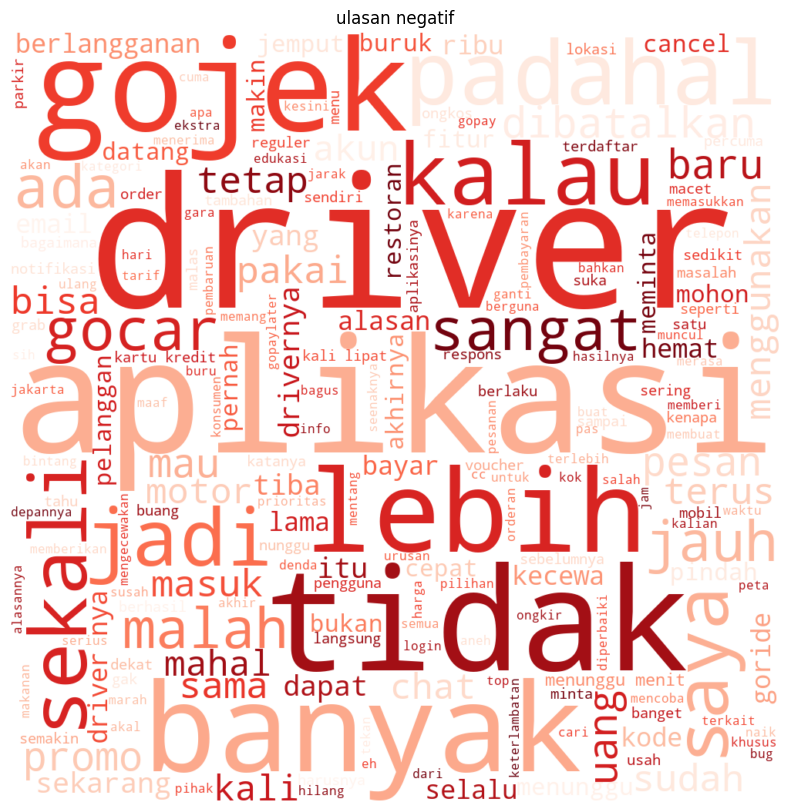

In [57]:
# membuat dan menampilkan visualisasi Word Cloud(kata yang sering muncul)
from wordcloud import WordCloud
all_text_s0 = ' '.join(word for word in train_s0['content'])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('ulasan negatif')
plt.margins(x=0, y=0)
plt.show()

In [58]:
# menyaring dan memproses data(label tertentu) & menangani nilai yang hilang
train_s1 = df_copy[df_copy['label'] == 'Positif']
train_s1['content'] = train_s1['content'].fillna('tidak ada komentar')
train_s1.head(50)

C:\Users\rizqi\AppData\Local\Temp\ipykernel_11932\3559771888.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s1['content'] = train_s1['content'].fillna('tidak ada komentar')


,content,score,thumbsUpCount,at,userName,label
5,ya memang sulit mencari driver restoran driver...,4,5,17/11/2024,cholis viki,Positif
8,mulai proses pemesanan pengantaran luar biasa ...,5,77,20/11/2024,Lukas Kerong N. (Luke),Positif
14,untuk goride perlu dipisah hemat yang comfort ...,4,51,25/10/2024,Bagus Tri Sukma,Positif
15,kadang lama mencari drivernya malah pernah dap...,4,4,12/11/2024,Tiani Putri29,Positif
16,dong gps nya dibuat lebih akurat pesan mana da...,3,12,08/11/2024,ydn99 bag,Positif
19,paket gojek sekarang lebih mahal jadi malas di...,3,2,19/11/2024,all trailer,Positif
22,kali pesan gocar setengah perjalanan menuju lo...,4,1,30/10/2024,K S,Positif
23,kecewa sekali sebelumnya memberi rating sekara...,5,38,18/11/2024,safira yunita,Positif
25,evaluasi driver gocar terutama gocar biasa car...,3,1,03/11/2024,Yogi Zaenal,Positif
27,pelanggan goride jarak pendek akhir akhir tida...,4,79,11/10/2024,Ujang Sobari,Positif


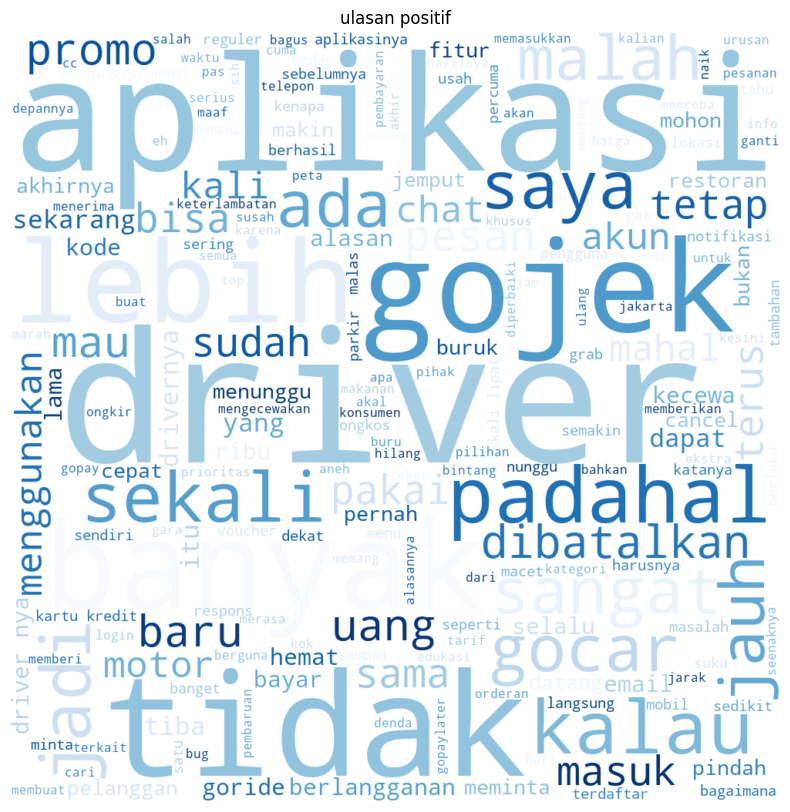

In [59]:
# membuat dan menampilkan visualisasi Word Cloud(kata yang sering muncul)
all_text_s1 = ' '.join(word for word in train_s0['content'])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s1)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('ulasan positif')
plt.margins(x=0, y=0)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

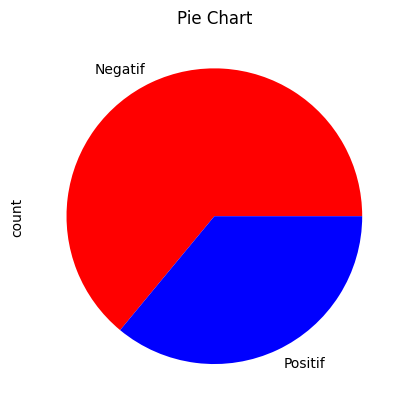

In [60]:
# Pie chart
sentimen_data = pd.value_counts(df_copy['label'], sort=True)
sentimen_data.plot(kind='pie', colors=['Red', 'Blue'])
plt.title('Pie Chart')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

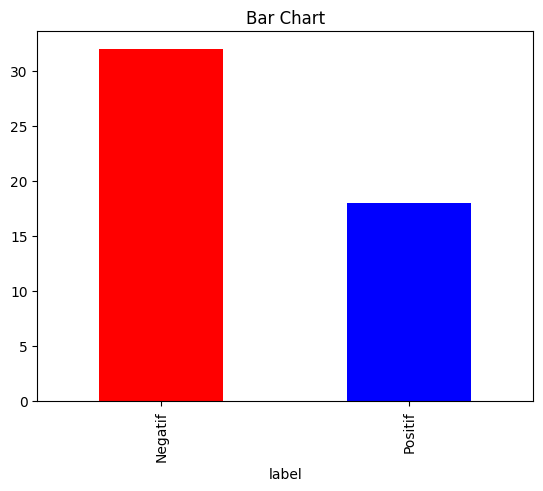

In [61]:
# menganalisis dan memvisualisasikan distribusi label sentimen dalam data
sentimen_data = pd.value_counts(df_copy['label'], sort=True)
sentimen_data.plot(kind='bar', color=['Red', 'Blue'])
plt.title('Bar Chart')
plt.show

SPLIT DATA(TF-IDF)

In [106]:
# membagi dataset train & test 80% untuk training dan 20% untuk testing
from sklearn.model_selection import train_test_split
result['content'] = result['content'].fillna('Tidak ada komentar')
x_train, x_test, y_train, y_test = train_test_split(result['content'], result['label'], test_size=0.2, stratify=result['label'], random_state=30)


In [107]:
# Hitung jumlah data latih dan data uji
train_size = len(x_train)
test_size = len(x_test)

In [108]:
# Hitung persentase
train_percentage = (train_size / (train_size + test_size)) * 100
test_percentage = (test_size / (train_size + test_size)) * 100
print(f"Data latih: {train_percentage:.2f}%")
print(f"Data uji: {test_percentage:.2f}%")

Data latih: 80.00%
Data uji: 20.00%


In [109]:
import numpy as np

In [111]:
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

print(x_train.shape)
print(x_test.shape)

(40, 486)
(10, 486)


In [112]:
x_train = x_train.toarray()
x_test = x_test.toarray()

MECHINE LEARNING(NLP MENGGUNAKAN ALGORITMA NAIVE BAYES)


In [113]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [ ]:
# melakukan hyperparameter tuning
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

#Teknik cross-validation
cv_method = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=999)

params_NB = {'var_smoothing': np.logspace(0, -9, num=100)}
#pelatihan model menggunakan GridSearchCV
gscv_nb = GridSearchCV(estimator=nb, param_grid=params_NB, cv= cv_method, verbose=1, scoring= 'accuracy')
gscv_nb.fit(x_train, y_train)
gscv_nb.best_params_

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


{'var_smoothing': 0.0012328467394420659}

In [115]:
# membuat sebuah model Naive Bayes berbasis Gaussian dengan parameter var_smoothing
nb = GaussianNB(var_smoothing=0.0012328467394420659)

LATIH MODEL DATA TRAINING

In [116]:

nb.fit(x_train, y_train)

GaussianNB(var_smoothing=0.0012328467394420659)

PREDIKSI DATA PADA DATA TESTING

In [117]:
y_pred_nb = nb.predict(x_test)
print(y_pred_nb)

['Positif' 'Negatif' 'Positif' 'Positif' 'Negatif' 'Negatif' 'Positif'
 'Negatif' 'Negatif' 'Negatif']


EVALUASI (CONFUSION MATRIX)

In [123]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [124]:
print("train Accuracy : ",nb.score(x_train,y_train))
print("test Accuracy : ",nb.score(x_test,y_test))

train Accuracy :  1.0
test Accuracy :  0.6


In [126]:
print('----- confusion matrix -----')
print(confusion_matrix(y_test, y_pred_nb))

print('----- classification report -----')
print(classification_report(y_test, y_pred_nb))

# Evaluasi: Akurasi dalam bentuk persen
accuracy = accuracy_score(y_test, y_pred_nb) * 100

print(f"\nAkurasi Model: {accuracy:.2f}%")

----- confusion matrix -----
[[4 2]
 [2 2]]
----- classification report -----
              precision    recall  f1-score   support

     Negatif       0.67      0.67      0.67         6
     Positif       0.50      0.50      0.50         4

    accuracy                           0.60        10
   macro avg       0.58      0.58      0.58        10
weighted avg       0.60      0.60      0.60        10


Akurasi Model: 60.00%
